# Ejecución Modelo PPO

### Instalación de paquetes y librerías

In [ ]:
! pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install stable-baselines3

  Using cached torch-2.7.0-cp310-cp310-manylinux_2_28_x86_64.whl (865.2 MB)
  Using cached triton-3.3.0-cp310-cp310-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (156.4 MB)
  Attempting uninstall: triton
    Found existing installation: triton 2.0.0
    Uninstalling triton-2.0.0:
      Successfully uninstalled triton-2.0.0
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.15 requires torch<2.4,>=1.10, but you have torch 2.7.0 which is incompatible.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 2.7.0 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 2.7.0 which is incompatible.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 2.7

In [ ]:
import gym
from gym import spaces

In [ ]:
import gymnasium as gym
from gymnasium import spaces

In [ ]:
!pip uninstall torch torchvision torchaudio

Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Would remove:
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.7.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or 

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.0.1%2Bcu118-cp310-cp310-linux_x86_64.whl (2267.3 MB)
  Using cached https://download.pytorch.org/whl/triton-2.0.0-1-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (63.3 MB)
  Attempting uninstall: triton
    Found existing installation: triton 3.3.0
    Uninstalling triton-3.3.0:
      Successfully uninstalled triton-3.3.0
  Attempting uninstall: torch
    Found existing installation: torch 2.7.0
    Uninstalling torch-2.7.0:
      Successfully uninstalled torch-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lightning 2.5.0.post0 requires torch<4.0,>=2.1.0, but you have torch 2.0.1+cu118 which is incompatible.
pytorch-lightning 2.5.0.post0 requires torch>=2.1.0, but you have torch 2.0.1+cu118 which is incompatible.
stable-b

In [ ]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/cu118/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu118/torch_stable.html


In [ ]:
!pip install implicit

In [ ]:
import gym
from gym import spaces
import gymnasium as gym
from gymnasium import spaces
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
import torch as th
import os
import numpy as np
import pandas as pd
from datetime import datetime
from zipfile import ZipFile
from urllib.request import urlretrieve
from sklearn.model_selection import train_test_split, ParameterGrid, KFold
from scipy.sparse import coo_matrix
from implicit.als import AlternatingLeastSquares
import numpy as np
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import itertools
import random

In [ ]:
#from stable_baselines3 import PPO
#from stable_baselines3.common.env_checker import check_env

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
#import torch as th

## Ejecución de funciones para el desarrollo del modelo PPO

In [ ]:
## Nueva correcion para Movies=1000 y usuarios=5000
class MovieLensEmbeddingEnv(gym.Env):
    def __init__(self, user_movie_ratings, movie_embeddings, max_steps=20):
        super().__init__()
        self.user_movie_ratings = user_movie_ratings
        self.movie_embeddings = movie_embeddings  # ndarray: [n_movies, embedding_dim]
        self.n_movies = movie_embeddings.shape[0]
        self.embedding_dim = movie_embeddings.shape[1]
        self.max_steps = max_steps
        self.action_space = spaces.Discrete(self.n_movies)
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf,
                                            shape=(self.embedding_dim * 10,), dtype=np.float32)

    def reset(self, seed=None, options=None):
        if seed is not None:
            np.random.seed(seed)
        self.user_id = np.random.choice(list(self.user_movie_ratings.keys()))
        user_history = self.user_movie_ratings[self.user_id]
        recent_movies = [m[0] for m in user_history[-10:]]
        # Padding con -1 (id inválido) si hay menos de 10
        recent_movies = recent_movies + [-1] * (10 - len(recent_movies))
        self.state = recent_movies
        self.steps = 0
        return self._get_obs(), {}

    def step(self, action):
        user_ratings = dict(self.user_movie_ratings[self.user_id])
        reward = user_ratings.get(int(action), 0)
        self.state = self.state[1:] + [action.item()]
        self.steps += 1
        done = self.steps >= self.max_steps
        return self._get_obs(), reward, done, False, {}

    def _get_obs(self):
        # Devuelve el embedding concatenado de las últimas 10 películas
        embeddings = []
        for movie_id in self.state:
            if movie_id == -1 or movie_id >= len(self.movie_embeddings):
               embeddings.append(np.zeros(self.embedding_dim))
            else:
               embeddings.append(self.movie_embeddings[movie_id])
        return np.concatenate(embeddings).astype(np.float32)

In [ ]:
class RewardOnlyLogger(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_rewards = []
        self.current_reward = 0

    def _on_step(self) -> bool:
        reward = self.locals['rewards'][0]
        self.current_reward += reward

        done = self.locals['dones'][0]
        if done:
            self.episode_rewards.append(self.current_reward)
            self.current_reward = 0
        return True

In [ ]:
#from stable_baselines3.common.callbacks import BaseCallback

class ValueLossLogger(BaseCallback):
    def __init__(self):
        super().__init__()
        self.iterations = []
        self.value_losses = []
        self.counter = 0

    def _on_rollout_end(self) -> None:
        # Intenta capturar la pérdida de valor desde los logs de Tensorboard/monitor
        try:
            logs = self.model.logger.name_to_value

            # Buscar la clave correcta según formato de SB3
            for key in ["train/value_loss", "value_loss"]:
                if key in logs:
                    self.value_losses.append(logs[key])
                    self.iterations.append(self.counter)
                    self.counter += 1
                    break
        except Exception as e:
            print(f"⚠️ Error al capturar value_loss: {e}")

    def _on_step(self) -> bool:
        return True


In [ ]:
def precision_at_k(model, env, data, k=5):
    precisions = []
    for user_id, interactions in data.items():
        env.user_id = user_id
        state, _ = env.reset()
        recommended = []
        seen = set(state)
        for _ in range(k):
            action, _ = model.predict(state)
            if action.item() in seen:
                continue
            recommended.append(action.item())
            seen.add(action.item())
            state, _, done, _, _ = env.step(action)
            if done:
                break

        true_items = set([m for m, r in interactions if r >= 3])
        hit = len(set(recommended) & true_items)
        precisions.append(hit / k)
    return np.mean(precisions)

In [ ]:
def recall_at_k(model, env, data, k=5):
    recalls = []
    for user_id, interactions in data.items():
        env.user_id = user_id
        state, _ = env.reset()
        recommended = []
        seen = set(state)
        for _ in range(k):
            action, _ = model.predict(state)
            if action.item() in seen:
                continue
            recommended.append(action.item())
            seen.add(action.item())
            state, _, done, _, _ = env.step(action)
            if done:
                break

        true_items = set([m for m, r in interactions if r >= 3])
        if len(true_items) == 0:
            continue  # evitar división por cero si el usuario no tiene ítems relevantes

        hit = len(set(recommended) & true_items)
        recalls.append(hit / len(true_items))
    return np.mean(recalls)

In [ ]:
def evaluate_reward(model, env, n_users=100, max_steps=20):
    total_rewards = []

    for _ in range(n_users):
        state, _ = env.reset()
        done = False
        total_reward = 0
        steps = 0
        while not done and steps < max_steps:
            action, _ = model.predict(state, deterministic=True)
            state, reward, done, _, _ = env.step(action)
            total_reward += reward
            steps += 1
        total_rewards.append(total_reward)

    avg_reward = np.mean(total_rewards)
    max_reward = np.max(total_rewards)
    return avg_reward, max_reward, total_rewards

In [ ]:
def recomendar_peliculas_para_usuario(model, env, reverse_movie_mapping, user_id=None, n=5):
    if user_id is not None:
        env.user_id = user_id
    state, _ = env.reset()
    recommended = []
    seen = set(state)
    for _ in range(n):
        action, _ = model.predict(state)
        if action.item() in seen:
            continue
        recommended.append(action.item())
        seen.add(action.item())
        state, reward, done, _, _ = env.step(action)
        if done:
            break
    # Convertir a IDs originales
    recommended_ids = [reverse_movie_mapping.get(i, -1) for i in recommended]
    return recommended_ids

In [ ]:
current_path = os.getcwd()
zip_path = os.path.join(current_path, "movielens.zip")
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-20m.zip", zip_path)
ZipFile(zip_path, "r").extractall(current_path)

ratingDF = pd.read_csv(os.path.join(current_path, "ml-20m/ratings.csv"))

# Procesamiento
ratingDF['timestamp'] = ratingDF['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
ratingDF['userId'] = ratingDF['userId'].astype(int)
ratingDF['movieId'] = ratingDF['movieId'].astype(int)
ratingDF['rating'] = ratingDF['rating'].astype(float)

num_peliculas = ratingDF['movieId'].nunique()
num_usuarios = ratingDF['userId'].nunique()

print(f"🎬 Número total de películas: {num_peliculas}")
print(f"👤 Número total de usuarios: {num_usuarios}")

🎬 Número total de películas: 26744
👤 Número total de usuarios: 138493


In [ ]:
#import os
#import numpy as np
#import pandas as pd
#from datetime import datetime
#from zipfile import ZipFile
#from urllib.request import urlretrieve
#from sklearn.model_selection import train_test_split, ParameterGrid, KFold

# ---------------------- 1. Descargar y preparar datos ----------------------
current_path = os.getcwd()
zip_path = os.path.join(current_path, "movielens.zip")
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-20m.zip", zip_path)
ZipFile(zip_path, "r").extractall(current_path)

ratingDF = pd.read_csv(os.path.join(current_path, "ml-20m/ratings.csv"))

# Procesamiento
ratingDF['timestamp'] = ratingDF['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
ratingDF['userId'] = ratingDF['userId'].astype(int)
ratingDF['movieId'] = ratingDF['movieId'].astype(int)
ratingDF['rating'] = ratingDF['rating'].astype(float)

# Top 1000 películas
top_movies = ratingDF.groupby("movieId").count().sort_values(by="rating", ascending=False).head(1000).index
ratingDF = ratingDF[ratingDF.movieId.isin(top_movies)]

# 1000 usuarios aleatorios
top_users = ratingDF.groupby("userId").count().sort_values(by="rating", ascending=False).sample(n=1000, random_state=42).index
ratingDF = ratingDF[ratingDF.userId.isin(top_users)]

# Reindexar películas y usuarios
movie_mapping = {movie: idx for idx, movie in enumerate(ratingDF.movieId.unique())}
user_mapping = {user: idx for idx, user in enumerate(ratingDF.userId.unique())}
ratingDF['movieId'] = ratingDF['movieId'].map(movie_mapping)
ratingDF['userId'] = ratingDF['userId'].map(user_mapping)


<ipython-input-42-fb5dbbb30fdd>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingDF['movieId'] = ratingDF['movieId'].map(movie_mapping)
<ipython-input-42-fb5dbbb30fdd>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingDF['userId'] = ratingDF['userId'].map(user_mapping)


In [ ]:
movies_df = pd.read_csv(os.path.join(current_path, "ml-20m/movies.csv"))

In [ ]:
reverse_movie_mapping = {v: k for k, v in movie_mapping.items()}

In [ ]:
# Crear Train/Validation/Test
user_movie_ratings = ratingDF.groupby('userId').apply(lambda x: list(zip(x['movieId'], x['rating']))).to_dict()
train_users, test_users = train_test_split(list(user_movie_ratings.keys()), test_size=0.2, random_state=2018)
valid_users, test_users = train_test_split(test_users, test_size=0.5, random_state=2018)
train_data = {u: user_movie_ratings[u] for u in train_users}

In [ ]:
valid_data = {u: user_movie_ratings[u] for u in valid_users}
test_data = {u: user_movie_ratings[u] for u in test_users}

## Determinar los parámetros óptimos para ALS

### Método: Búsqueda aleatoria

In [ ]:
#from scipy.sparse import coo_matrix
#from implicit.als import AlternatingLeastSquares
#import numpy as np

# Considerar train_data para crear Train_data_R y Test_data_R
train_data_list = [(u, m, r) for u, items in train_data.items() for m, r in items]
train_data_df = pd.DataFrame(train_data_list, columns=['userId', 'movieId', 'rating'])

train_df, test_df = train_test_split(train_data_df, test_size=0.2, random_state=42)

In [ ]:
# Crear matriz dispersa para ALS
n_users = ratingDF['userId'].nunique()
n_movies = ratingDF['movieId'].nunique()

def build_sparse_matrix(df):
    return coo_matrix((df['rating'], (df['userId'], df['movieId'])), shape=(n_users, n_movies))

train_matrix = build_sparse_matrix(train_df)
test_matrix = build_sparse_matrix(test_df)

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 50, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0034279823303222656 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028853416442871094 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002911090850830078 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027604103088378906 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

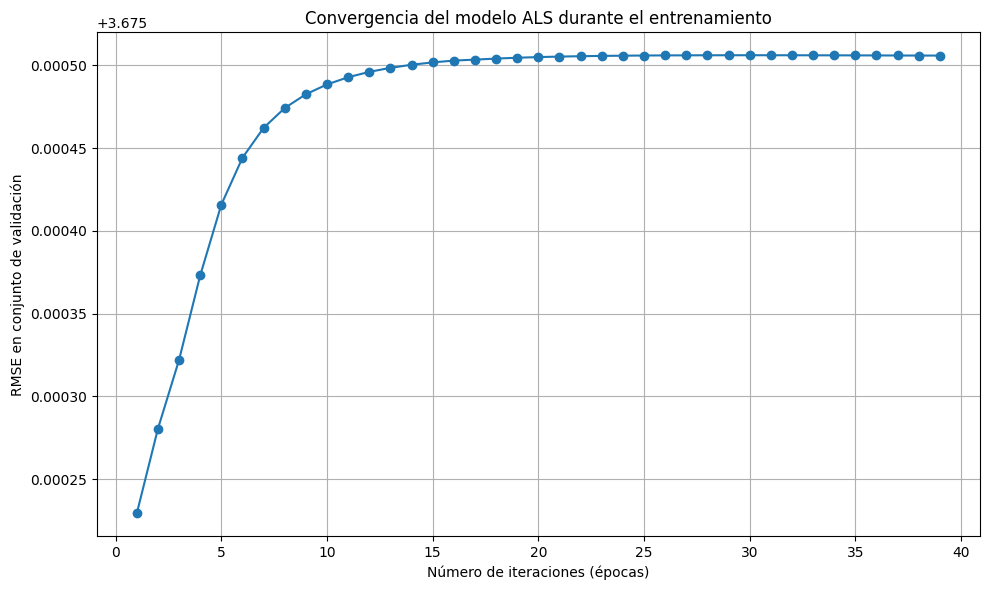

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 50, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002971649169921875 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027420520782470703 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0026361942291259766 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0024313926696777344 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

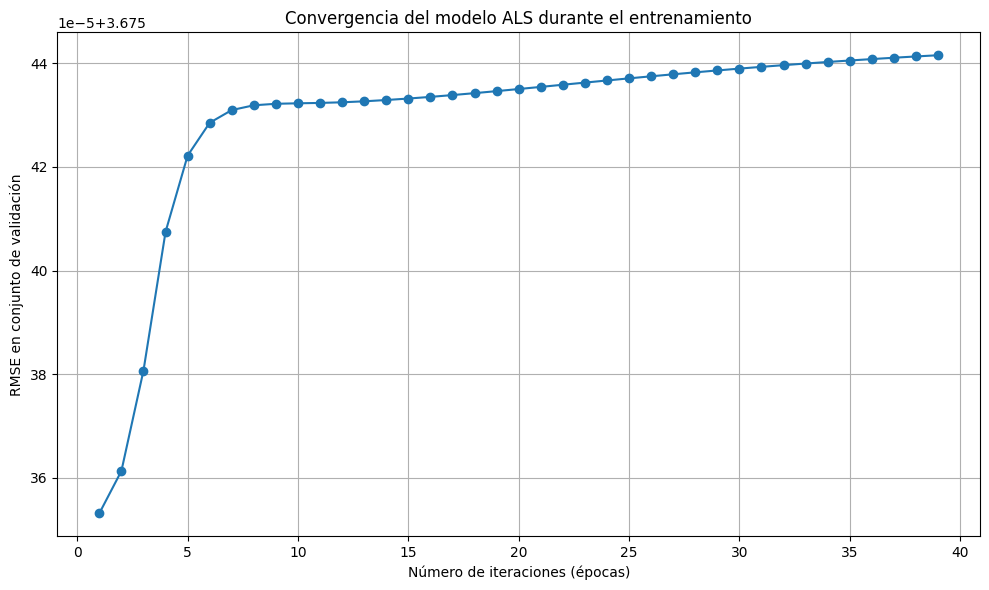

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 50, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0031044483184814453 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029754638671875 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002754688262939453 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002508878707885742 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to C

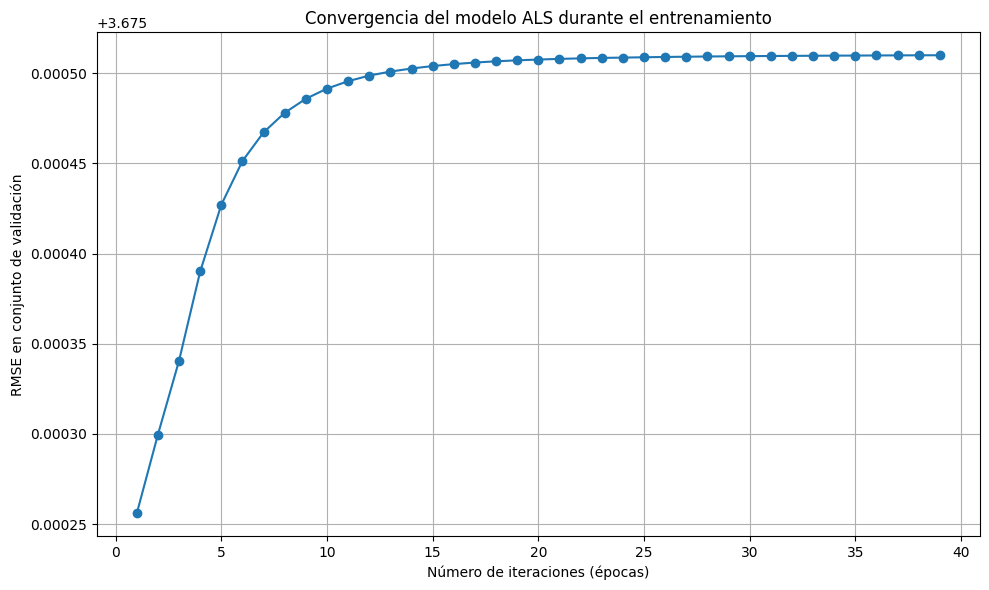

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 100, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002832651138305664 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0024521350860595703 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002639293670654297 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028302669525146484 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

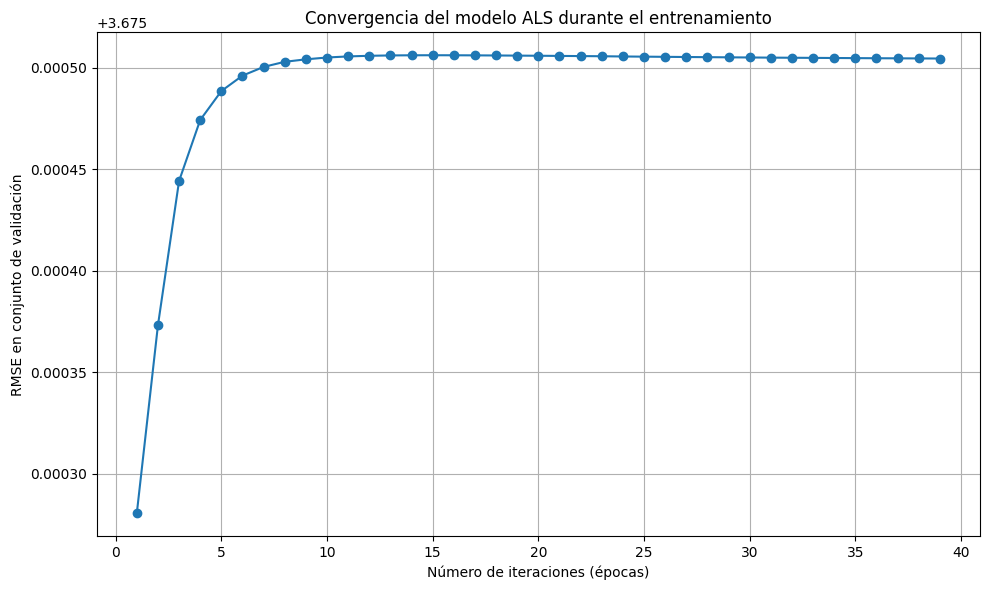

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 100, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002717733383178711 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027315616607666016 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0026903152465820312 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002422809600830078 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

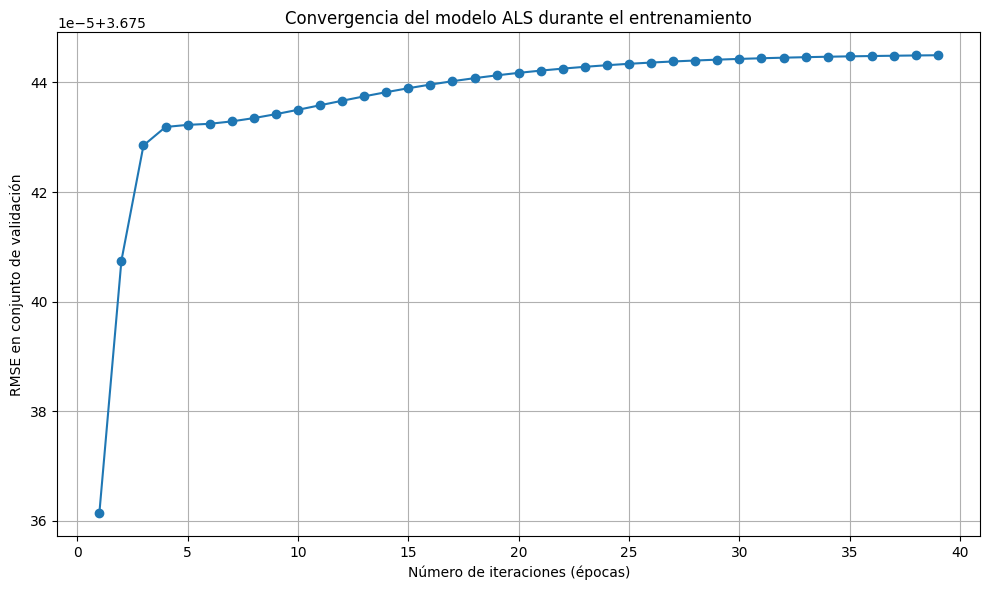

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 100, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029904842376708984 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003062009811401367 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030503273010253906 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002523183822631836 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

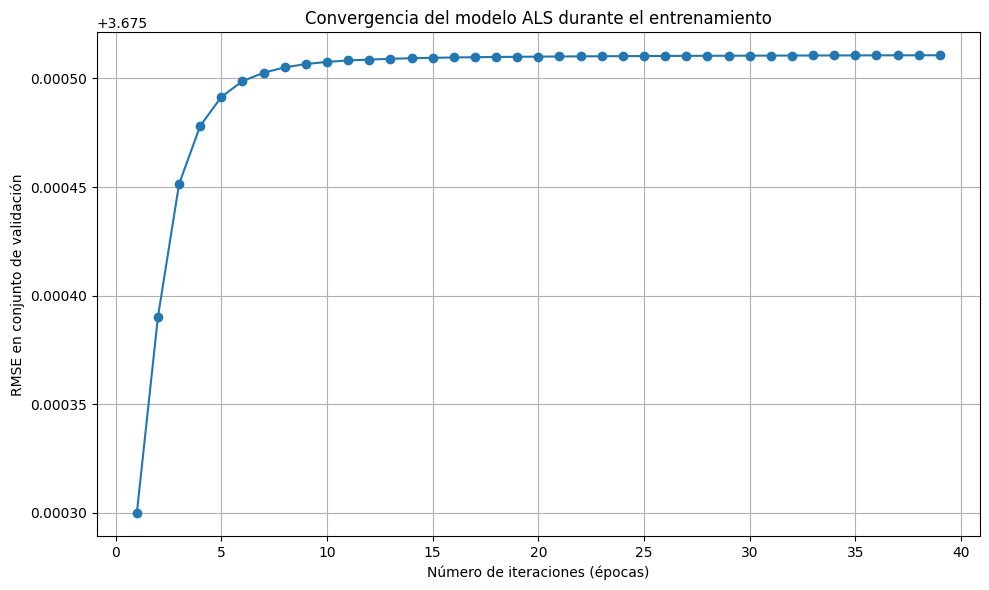

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 300, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003150463104248047 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003877401351928711 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028269290924072266 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027856826782226562 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

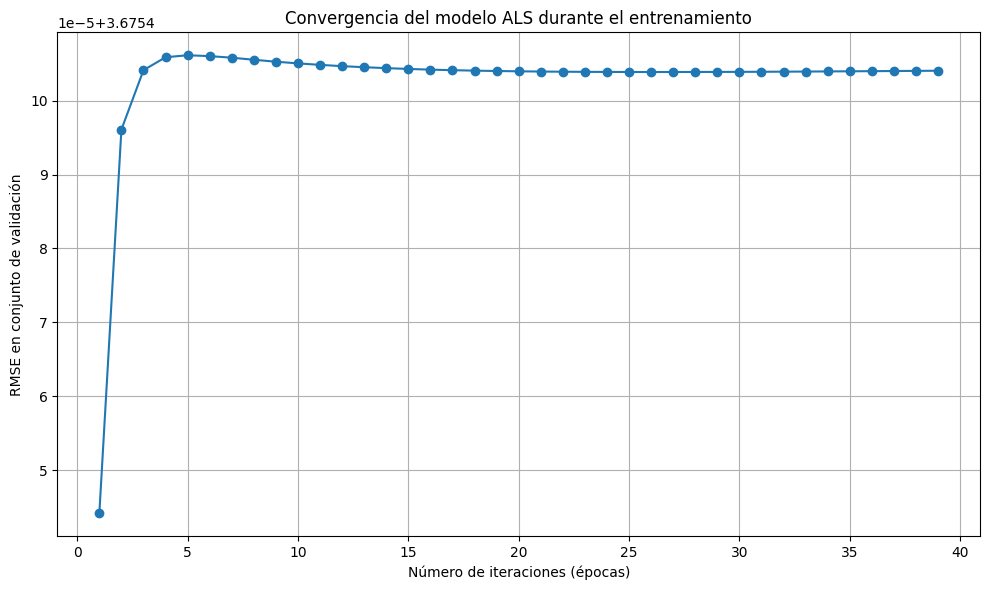

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 300, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029103755950927734 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002768278121948242 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003052234649658203 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027878284454345703 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

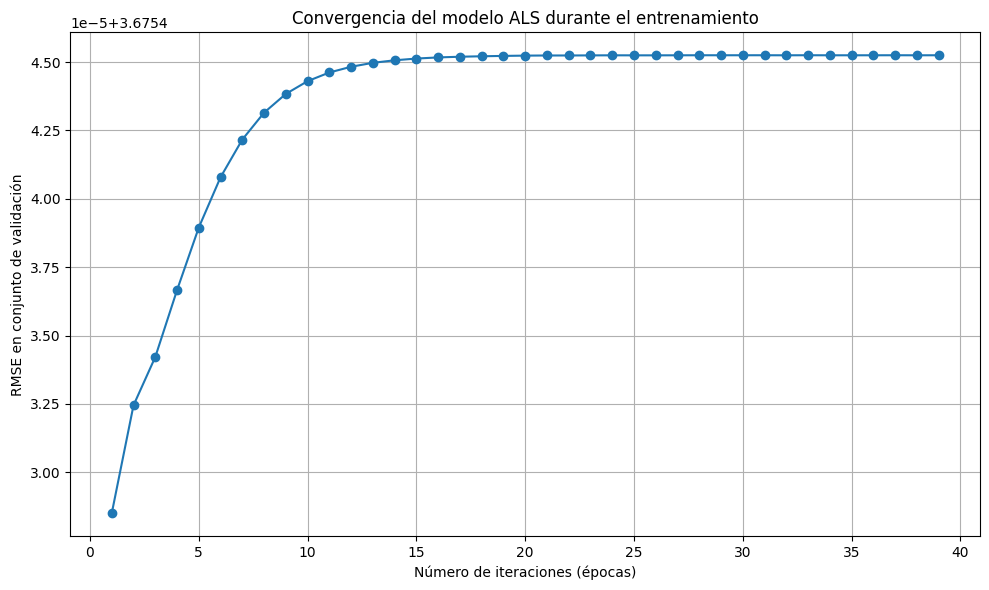

🔄 Entrenando ALS con params: {'factors': 50, 'iterations': 300, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003034830093383789 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030870437622070312 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029518604278564453 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027353763580322266 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

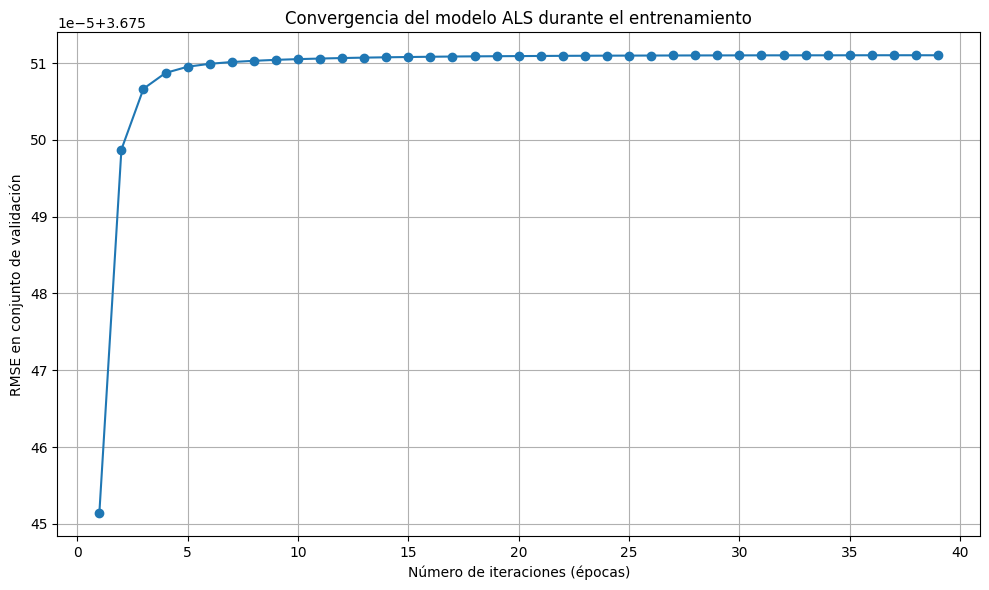

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 50, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030841827392578125 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003062725067138672 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002819538116455078 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002746105194091797 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to

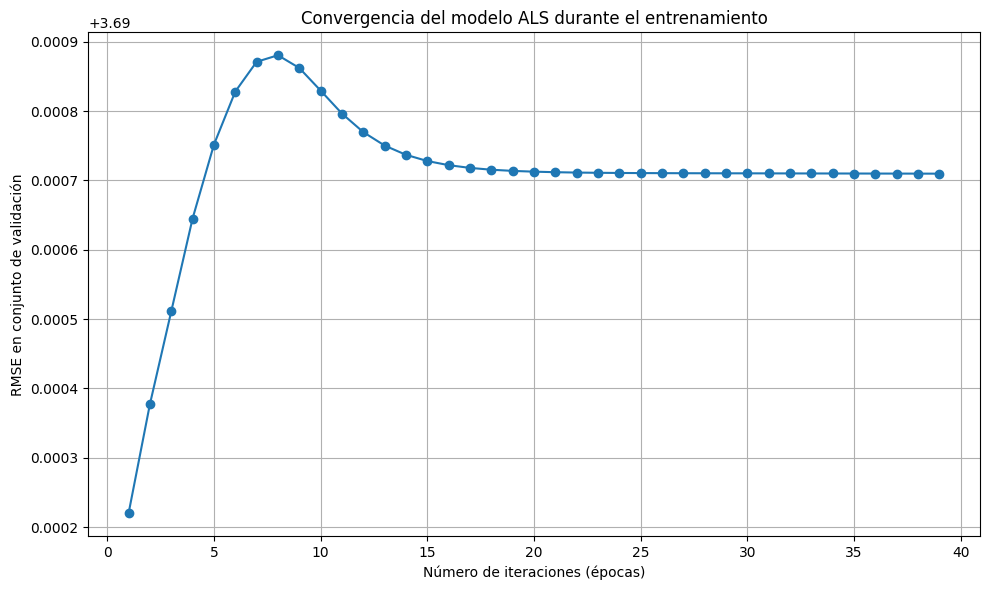

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 50, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030345916748046875 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027446746826171875 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027251243591308594 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002671480178833008 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

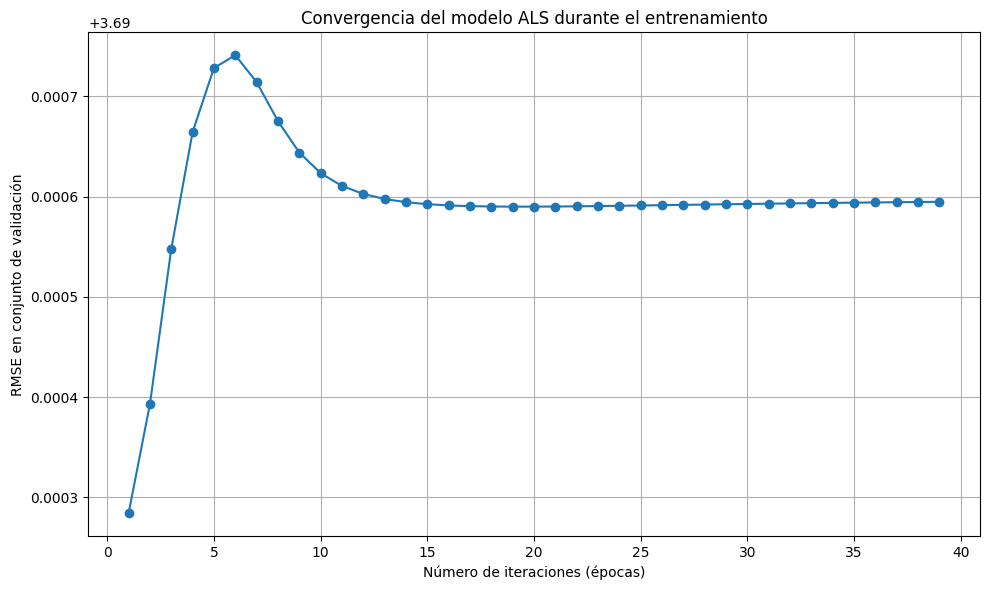

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 50, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003134012222290039 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029206275939941406 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0032150745391845703 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0025713443756103516 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

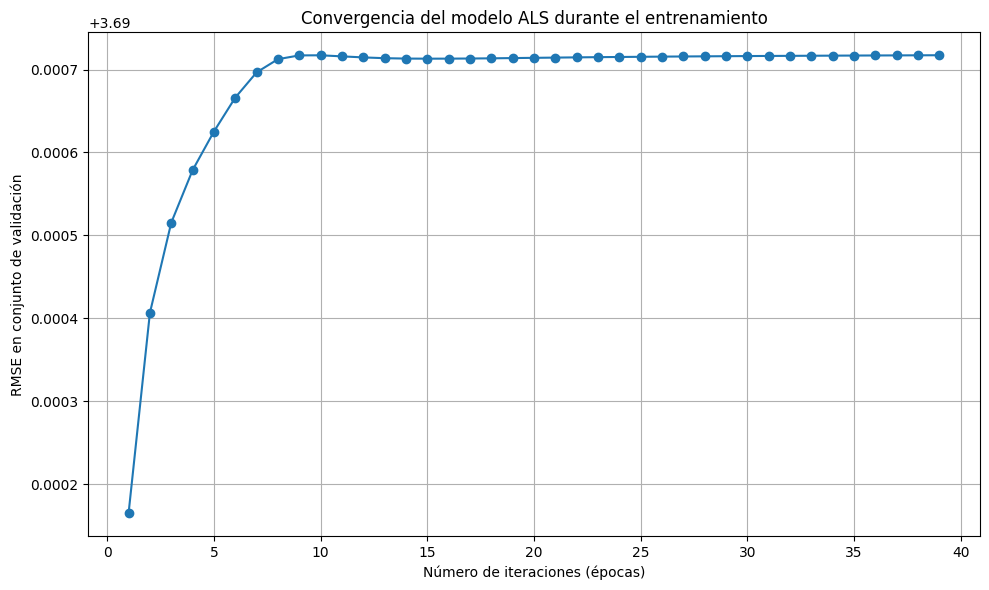

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 100, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029129981994628906 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027132034301757812 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0024576187133789062 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028710365295410156 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting

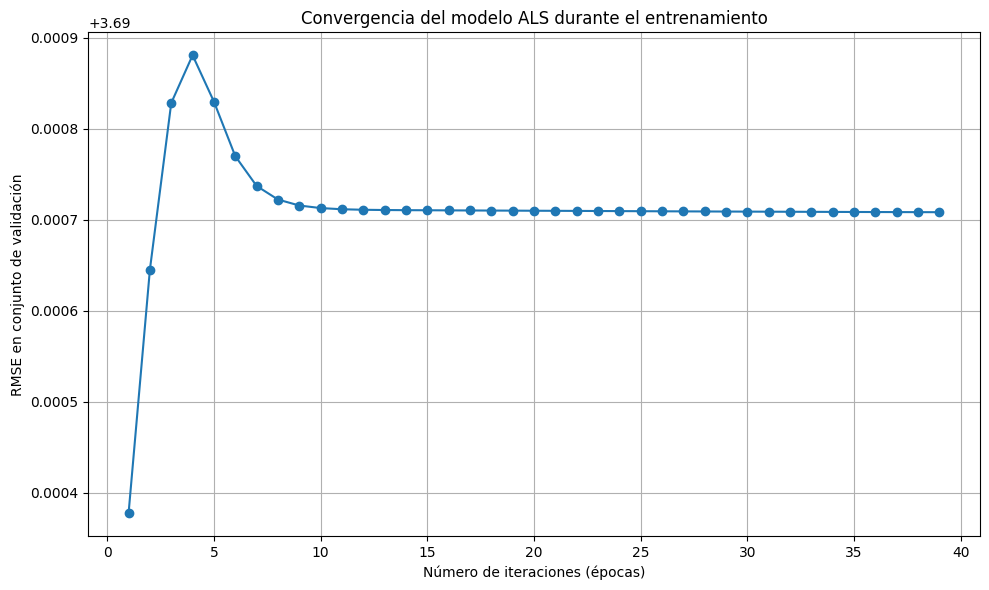

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 100, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002712726593017578 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002765655517578125 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0032465457916259766 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002454042434692383 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to

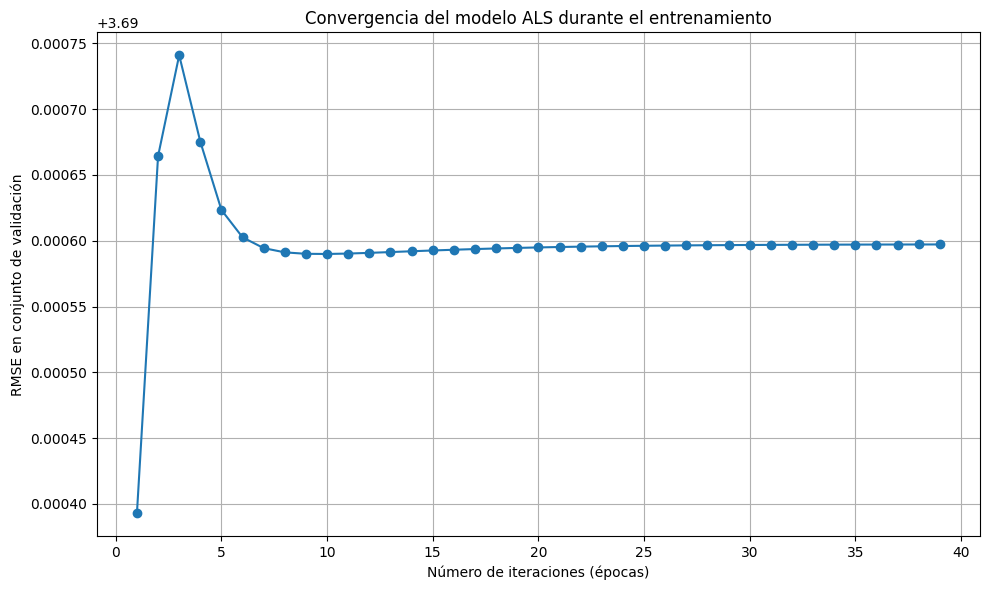

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 100, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002756357192993164 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028769969940185547 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0025479793548583984 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003119945526123047 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

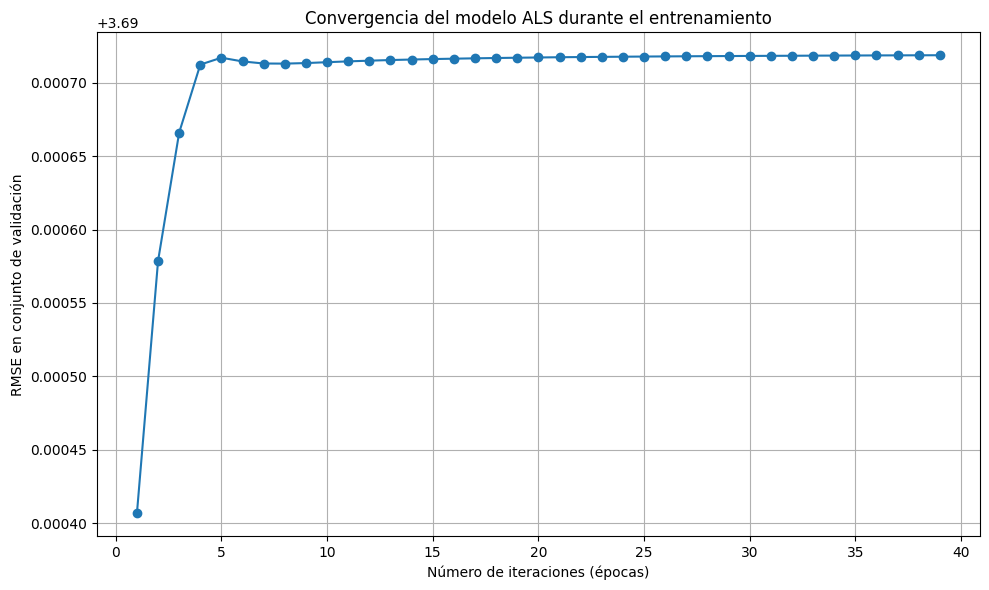

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 300, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029392242431640625 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003287792205810547 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003319263458251953 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030400753021240234 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

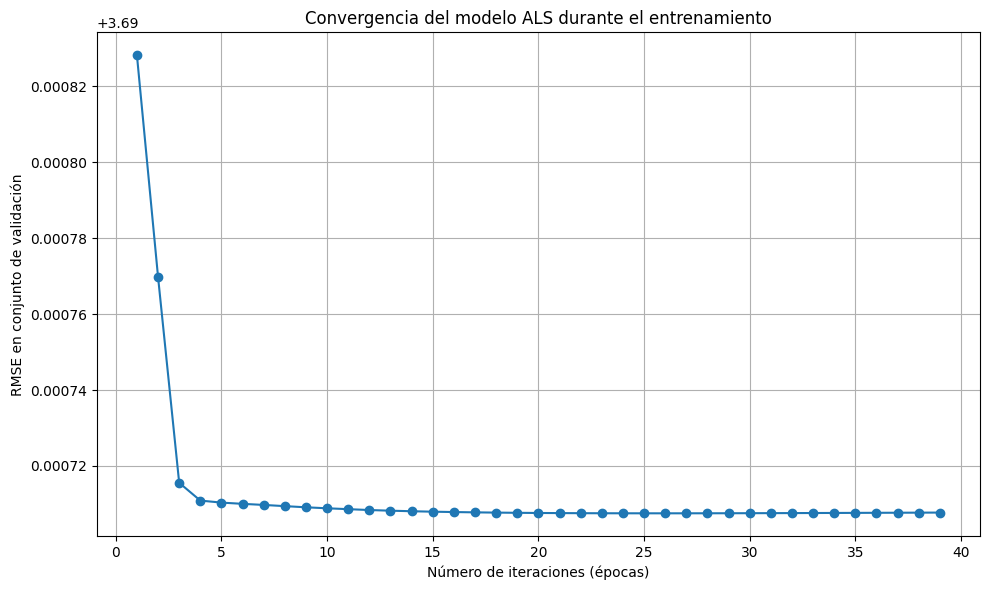

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 300, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0032351016998291016 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003339052200317383 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003010988235473633 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0032448768615722656 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

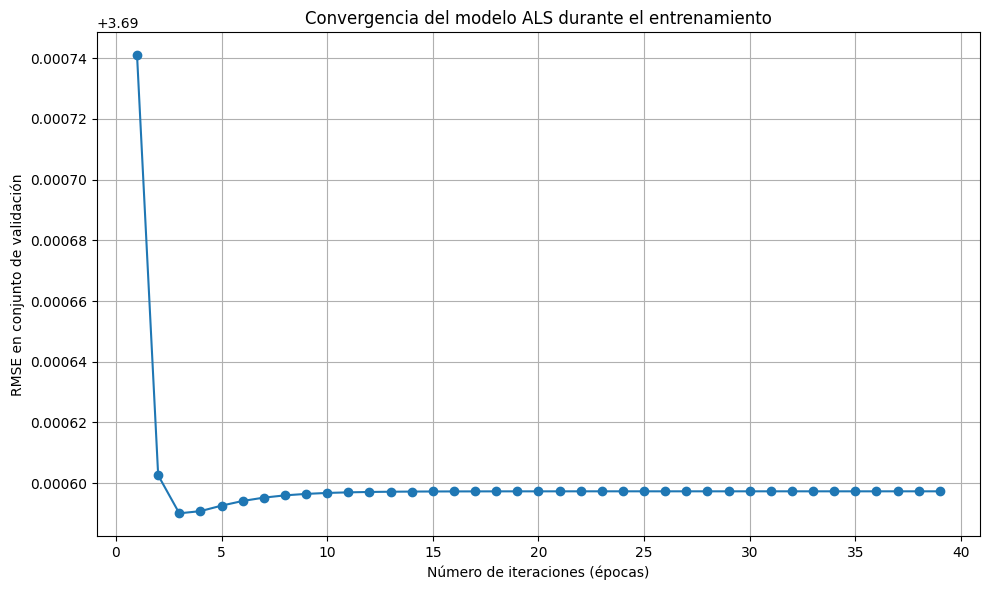

🔄 Entrenando ALS con params: {'factors': 100, 'iterations': 300, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028274059295654297 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003046274185180664 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028100013732910156 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029087066650390625 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

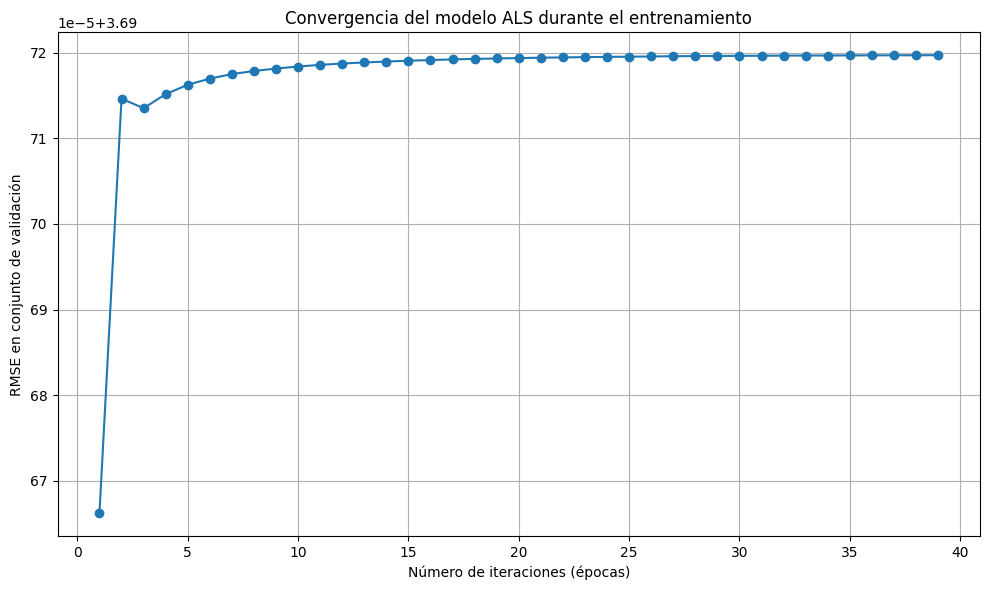

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 50, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003416299819946289 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003021240234375 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027484893798828125 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002973318099975586 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CS

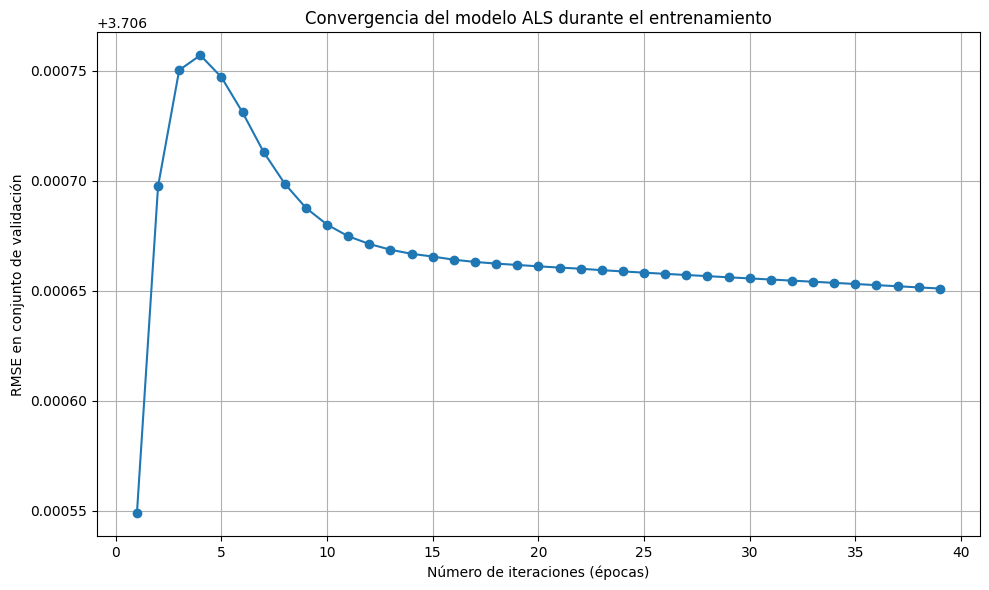

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 50, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002893686294555664 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0025577545166015625 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0026094913482666016 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002695322036743164 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

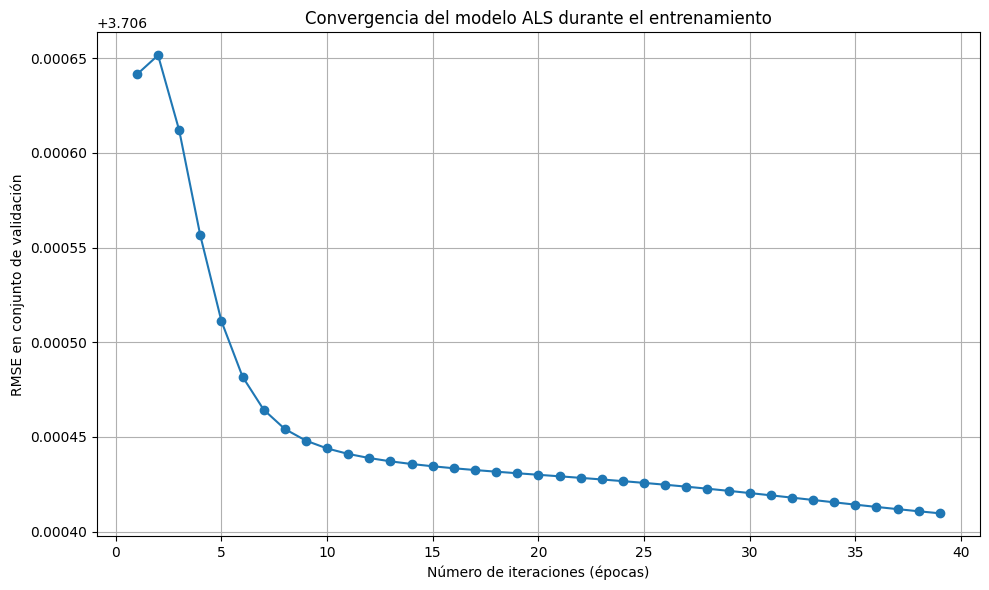

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 50, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029096603393554688 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029799938201904297 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002866983413696289 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002782583236694336 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting t

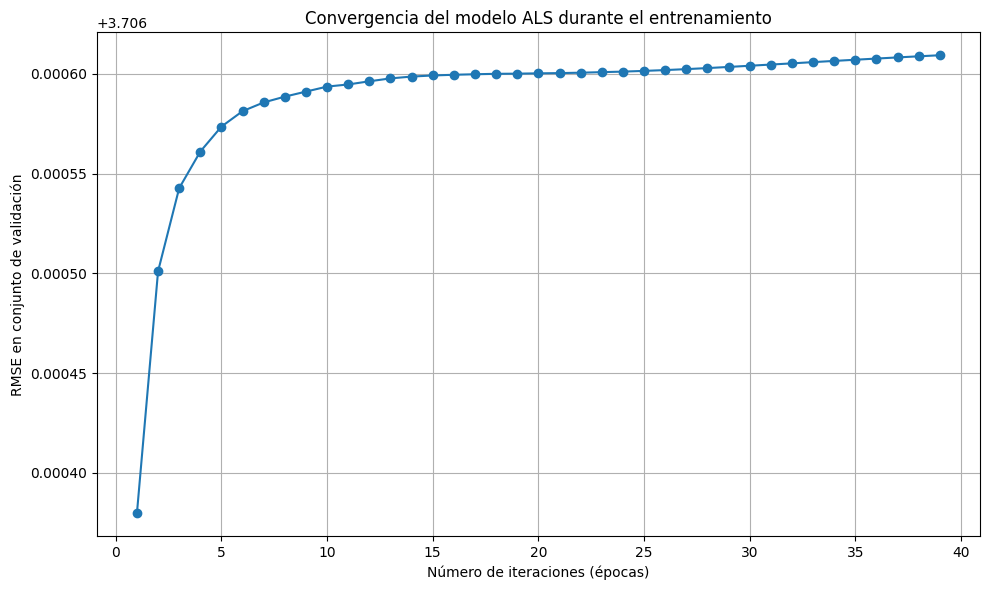

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 100, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029404163360595703 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028862953186035156 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002876758575439453 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0032668113708496094 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

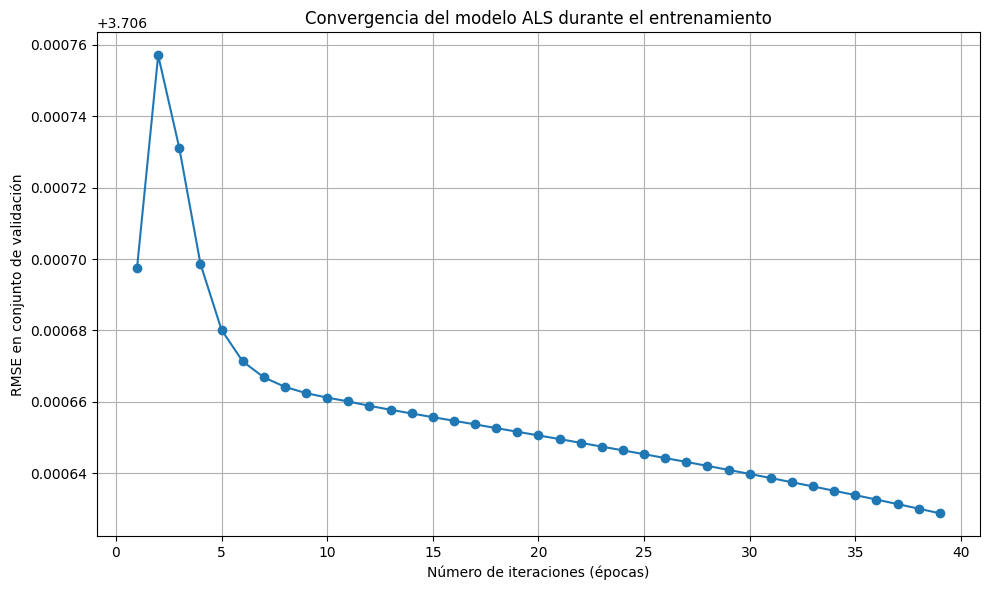

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 100, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002918243408203125 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002711772918701172 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029637813568115234 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003033876419067383 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to

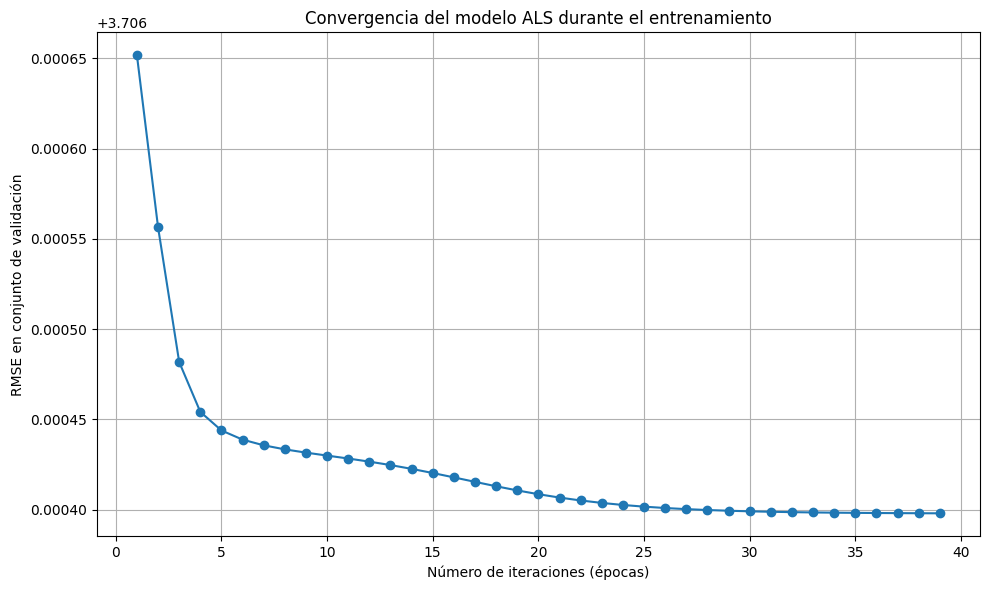

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 100, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028676986694335938 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029990673065185547 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003061056137084961 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0030002593994140625 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

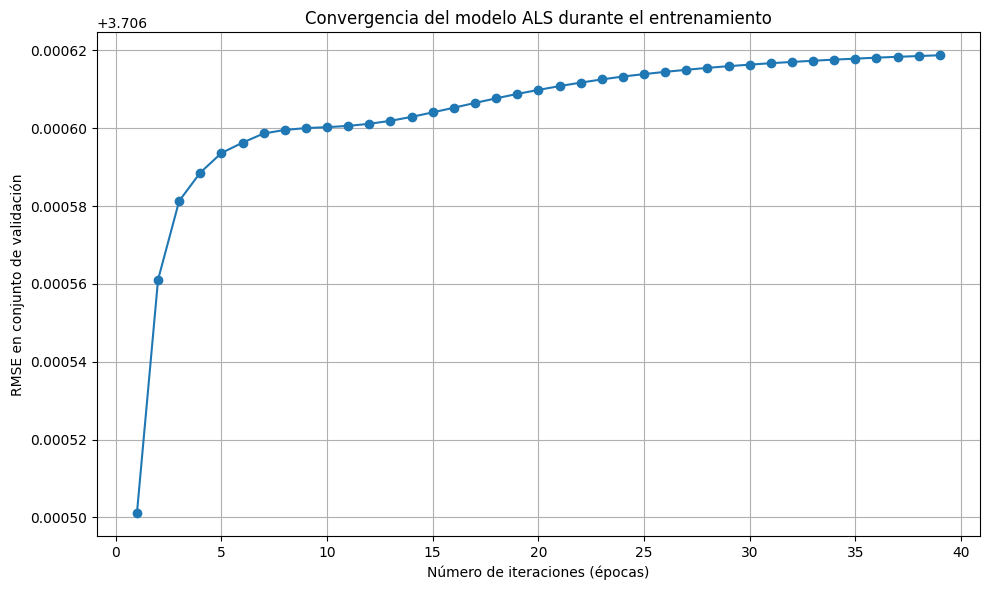

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 300, 'regularization': 0.01}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003113985061645508 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003240346908569336 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003096342086791992 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0027391910552978516 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to

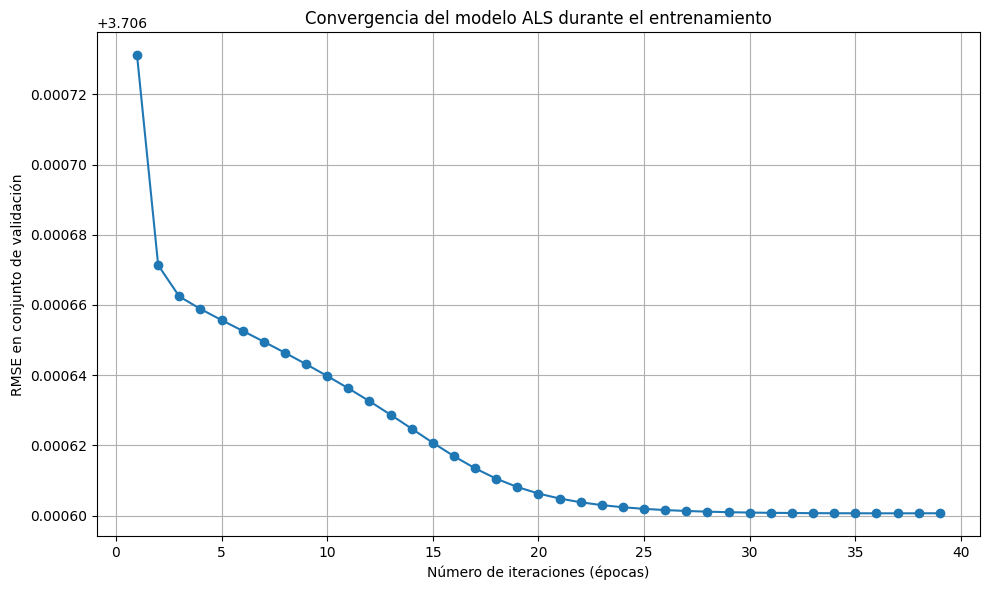

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 300, 'regularization': 0.1}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003269672393798828 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.003191232681274414 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028276443481445312 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00311279296875 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR

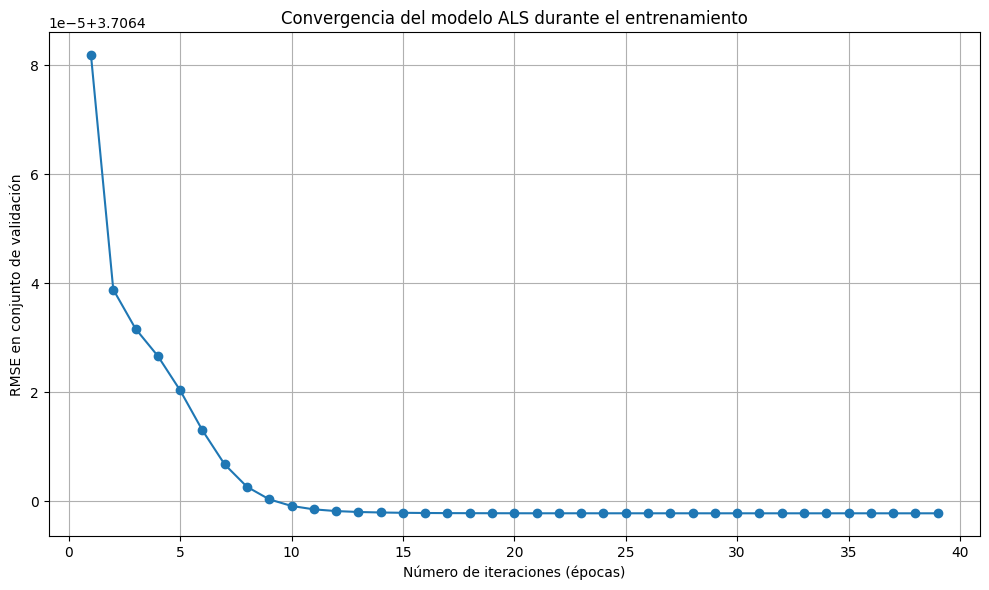

🔄 Entrenando ALS con params: {'factors': 400, 'iterations': 300, 'regularization': 0.001}


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0034227371215820312 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0029726028442382812 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0028896331787109375 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.002811908721923828 seconds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting 

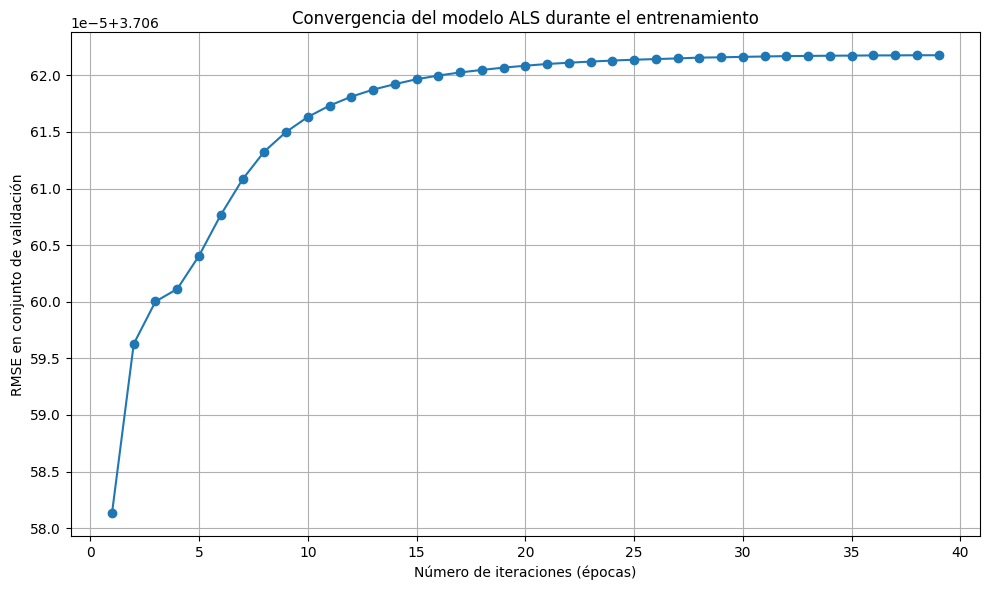

In [ ]:
# 2. Validación cruzada sobre ALS
param_grid = {
    'factors': [50, 100, 400],
    'regularization': [0.01, 0.1, 0.001],
    'iterations': [50, 100, 300]
}

results = []
for params in ParameterGrid(param_grid):
    print(f"🔄 Entrenando ALS con params: {params}")
    model = AlternatingLeastSquares(
        factors=params['factors'],
        regularization=params['regularization'],
        iterations=params['iterations'],
        random_state=42
    )
    errors = []

    for i in range(1,40):
        model.fit(train_matrix.T, show_progress = False)

        # Convertir factores a NumPy para evitar errores de tipo
        user_factors = model.user_factors.to_numpy()
        item_factors = model.item_factors.to_numpy()

        # Predicción sobre test_data_R
        test_coords = list(zip(test_df['userId'], test_df['movieId']))
        predictions = np.array([
            np.dot(user_factors[u], item_factors[m]) for u, m in test_coords
        ])
        rmse = np.sqrt(np.mean((predictions - test_df['rating'].values) ** 2))
        errors.append(rmse)

    results.append({
        'factors': params['factors'],
        'regularization': params['regularization'],
        'iterations': 40,
        'rmse': errors[-1]
    })

    results_df = pd.DataFrame(results)
    best_params = results_df.sort_values('rmse').iloc[0]

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 40), errors, marker='o')
    plt.xlabel('Número de iteraciones (épocas)')
    plt.ylabel('RMSE en conjunto de validación')
    plt.title('Convergencia del modelo ALS durante el entrenamiento')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Método: Validación cruzada (k=10)

In [ ]:
# 2. Validación cruzada sobre ALS
param_grid = {
    'factors': [50, 100, 400],
    'regularization': [0.01, 0.1, 0.001],
    'iterations': [50, 100, 200]
}

kf = KFold(n_splits= 10, shuffle=True, random_state=42)
results = []

for params in ParameterGrid(param_grid):
    print(f"🔄 Entrenando ALS con parámetros: {params}")
    fold_errors = []

    for fold_idx, (train_idx, test_idx) in enumerate(kf.split(train_data_df)):
        train_df = train_data_df.iloc[train_idx]
        test_df = train_data_df.iloc[test_idx]

        # Reindexar usuarios y películas para cada fold
        user_id_map = {id_: i for i, id_ in enumerate(train_df['userId'].unique())}
        movie_id_map = {id_: i for i, id_ in enumerate(train_df['movieId'].unique())}

        train_df['userId_reindexed'] = train_df['userId'].map(user_id_map)
        train_df['movieId_reindexed'] = train_df['movieId'].map(movie_id_map)

        test_df['userId_reindexed'] = test_df['userId'].map(user_id_map)
        test_df['movieId_reindexed'] = test_df['movieId'].map(movie_id_map)

        # Eliminar filas con NaN (usuarios o películas no vistos durante el entrenamiento)
        test_df = test_df.dropna(subset=['userId_reindexed', 'movieId_reindexed'])

        # Asegurarse que los nuevos índices sean enteros
        train_df = train_df.astype({'userId_reindexed': 'int', 'movieId_reindexed': 'int'})
        test_df = test_df.astype({'userId_reindexed': 'int', 'movieId_reindexed': 'int'})

        n_users_fold = train_df['userId_reindexed'].nunique()
        n_movies_fold = train_df['movieId_reindexed'].nunique()

        # Crear matriz dispersa para entrenamiento
        train_matrix = coo_matrix(
            (train_df['rating'], (train_df['userId_reindexed'], train_df['movieId_reindexed'])),
            shape=(n_users_fold, n_movies_fold)
        )
        model = AlternatingLeastSquares(
            factors=params['factors'],
            regularization=params['regularization'],
            iterations=params['iterations'],
            random_state=42
        )

        rmse_per_iter = []
        for i in range(1, 31):  # Simular 30 iteraciones
            model.iterations = i
            model.fit(train_matrix.T, show_progress=False)

            user_factors = model.user_factors.to_numpy()
            item_factors = model.item_factors.to_numpy()

            test_coords = list(zip(test_df['userId'], test_df['movieId']))
            predictions = np.array([
                np.dot(user_factors[u], item_factors[m])
                for u, m in test_coords
                if u < user_factors.shape[0] and m < item_factors.shape[0]
            ])
            true_ratings = test_df[
                (test_df['userId'] < user_factors.shape[0]) &
                (test_df['movieId'] < item_factors.shape[0])
            ]['rating'].values

            rmse = np.sqrt(np.mean((predictions - true_ratings) ** 2))
            rmse_per_iter.append(rmse)

        fold_errors.append(rmse_per_iter)

    # Promedio por iteración a lo largo de los folds
    avg_rmse_per_iter = np.mean(fold_errors, axis=0)

    results.append({
        'params': params,
        'rmse_final': avg_rmse_per_iter[-1],
        'rmse_curve': avg_rmse_per_iter
    })

    # Gráfico de convergencia
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 31), avg_rmse_per_iter, marker='o')
    plt.title(f"Convergencia RMSE - factors={params['factors']}, reg={params['regularization']}")
    plt.xlabel('Iteraciones')
    plt.ylabel('RMSE promedio (validación cruzada)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 4. Mostrar tabla de resultados finales
results_df = pd.DataFrame([{
    'factors': r['params']['factors'],
    'regularization': r['params']['regularization'],
    'iterations': r['params']['iterations'],
    'rmse_final': r['rmse_final']
} for r in results])

print("🏆 Resultados Finales:")
print(results_df.sort_values(by='rmse_final'))

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
### Se aplica ALS sobre el conjunto de entrenamiento de MovieLesn con los parametros previamente determinados para ALS
train_rows = []
for user_id, movies in train_data.items():
    for movie_id, rating in movies:
        train_rows.append((user_id, movie_id, rating))

train_df = pd.DataFrame(train_rows, columns=['userId', 'movieId', 'rating'])

row = train_df['userId'].values
col = train_df['movieId'].values
data = train_df['rating'].values

ratings_matrix = coo_matrix((data, (row, col)))

als_model = AlternatingLeastSquares(factors=400, regularization=0.1, iterations=100)
als_model.fit(ratings_matrix.T)
movie_embeddings = als_model.item_factors.to_numpy()

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0035042762756347656 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

## Ejecución para determinar parámetros óptimos para la ejecución de PPO

In [ ]:
from stable_baselines3 import PPO
import numpy as np

# Define el espacio de los hiperparámetros
param_grid = {
    'learning_rate': [1e-3, 1e-5, 1e-8],
    #'n_steps': [128, 256, 512],
    'batch_size': [64, 256, 512],
    'n_epochs': [5, 10, 20]
    #'gamma': [0.95, 0.99],
    #'gae_lambda': [0.9, 0.95],
    #'clip_range': [0.1, 0.2, 0.3],
    #'ent_coef': [0.0, 0.01, 0.1]
}

# Genera todas las combinaciones posibles de hiperparámetros
import itertools
param_combinations = list(itertools.product(*param_grid.values()))
param_combinations = [dict(zip(param_grid.keys(), combo)) for combo in param_combinations]

# Inicializa la lista para guardar los resultados
results = []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Entrenar y evaluar para cada combinación de hiperparámetros
for params in param_combinations:
    print(f"Entrenando con parámetros: {params}")

    # Crear el entorno de entrenamiento
    train_env = MovieLensEmbeddingEnv(train_data, movie_embeddings)

    # Crear el modelo PPO con la combinación de hiperparámetros
    model = PPO("MlpPolicy", train_env, verbose=0, **params)

    # Entrenar el modelo
    model.learn(total_timesteps=300_000)

    # Evaluar el modelo en el conjunto de prueba
    test_env = MovieLensEmbeddingEnv(test_data, movie_embeddings)
    precision_test = precision_at_k(model, test_env, test_data, k=5)

    # Guardar los resultados
    results.append({'params': params, 'precision_test': precision_test})

# Mostrar los resultados
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)

Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 5}


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 10}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 20}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 5}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 10}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 20}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 5}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 10}
Entrenando con parámetros: {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 20}
Entrenando con parámetros: {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 5}
Entrenando con parámetros: {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 10}
Entrenando con parámetros: {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 20}
Entrenando con parámetros: {'learning_rate': 1e-05,

In [ ]:
param_combinations

[{'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 5},
 {'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 10},
 {'learning_rate': 0.001, 'batch_size': 64, 'n_epochs': 20},
 {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 5},
 {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 10},
 {'learning_rate': 0.001, 'batch_size': 256, 'n_epochs': 20},
 {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 5},
 {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 10},
 {'learning_rate': 0.001, 'batch_size': 512, 'n_epochs': 20},
 {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 5},
 {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 10},
 {'learning_rate': 1e-05, 'batch_size': 64, 'n_epochs': 20},
 {'learning_rate': 1e-05, 'batch_size': 256, 'n_epochs': 5},
 {'learning_rate': 1e-05, 'batch_size': 256, 'n_epochs': 10},
 {'learning_rate': 1e-05, 'batch_size': 256, 'n_epochs': 20},
 {'learning_rate': 1e-05, 'batch_size': 512, 'n_epochs': 5},
 {'learning_rate': 1

### Resultados óptimos

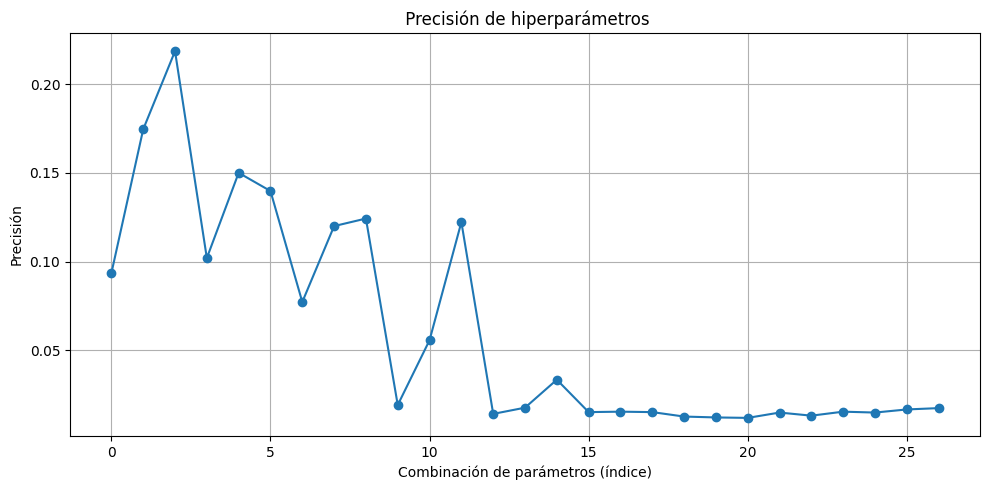

In [ ]:
#Grafica
import matplotlib.pyplot as plt

# Asegúrate de que df_results tenga índice numérico continuo
df_results.reset_index(drop=True, inplace=True)

# Crear el gráfico de curva
plt.figure(figsize=(10, 5))
plt.plot(df_results.index, df_results['precision_test'], marker='o', linestyle='-')
plt.title(' Precisión de hiperparámetros')
plt.xlabel('Combinación de parámetros (índice)')
plt.ylabel('Precisión')
plt.grid(True)
plt.tight_layout()
plt.show()


### Esquema iterativo para la ejecución y entrenamiento junto con su respectiva validación del modelo PPO.


🚀 Procesando combinación: 1000 películas y 1000 usuarios


<ipython-input-95-f5593b3db4d1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['movieId'] = filtered_df['movieId'].map(movie_mapping)
<ipython-input-95-f5593b3db4d1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['userId'] = filtered_df['userId'].map(user_mapping)
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.0035772323608398438 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


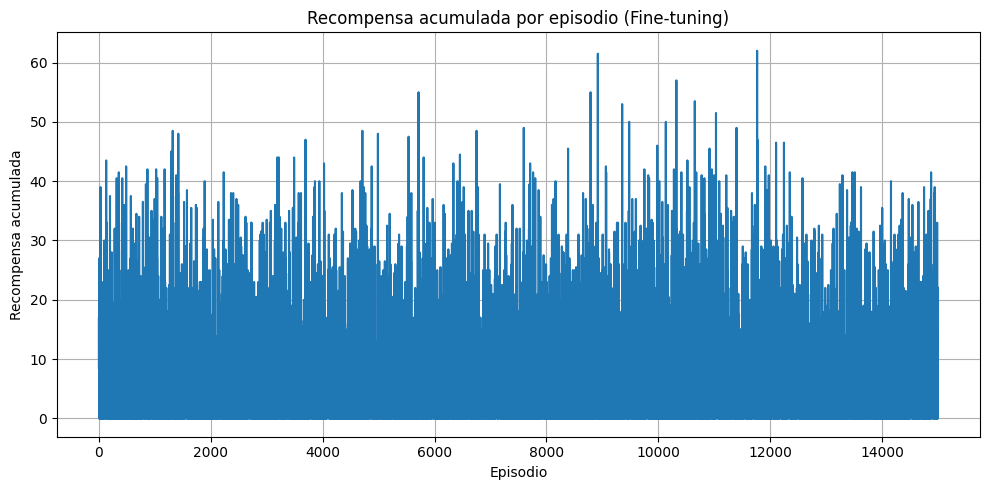

🔹 Recompensas iniciales: [8.5, 17.0, 16.0, 7.0, 5.0]
🔹 Máxima recompensa: 62.00
🔹 Promedio: 6.45
🔹 Promedio últimos 100 episodios: 6.28


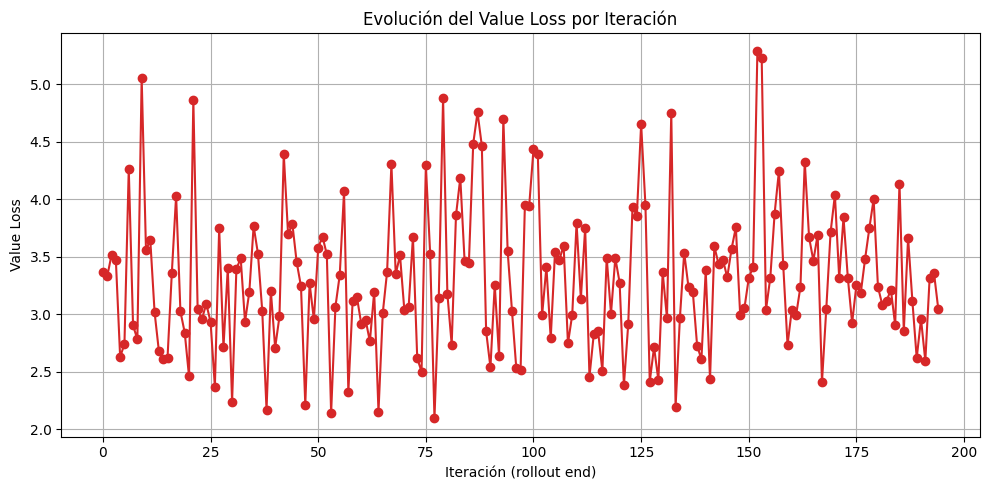


📊 RESULTADOS FINALES
       Precision@5  Recall@5  Avg Reward  Max Reward
Train        0.073    0.0052      10.605        49.5
Valid        0.080    0.0047      10.400        44.5
Test         0.068    0.0062      12.445        48.0
🎯 Usuario ID: 364
🎬 Películas recomendadas (movieId): [2872, 4019, 2371, 1367, 4148]
📽️ Títulos recomendados: ['Excalibur (1981)', 'Finding Forrester (2000)', 'Fletch (1985)', '101 Dalmatians (1996)', 'Hannibal (2001)']

🚀 Procesando combinación: 50000 películas y 5000 usuarios


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.029323101043701172 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


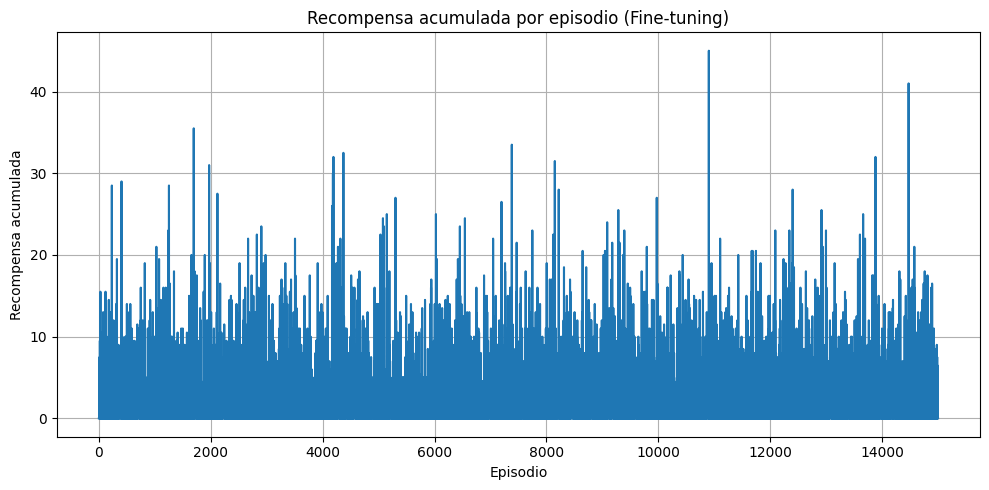

🔹 Recompensas iniciales: [0.0, 0.0, 0.0, 0.0, 0.0]
🔹 Máxima recompensa: 45.00
🔹 Promedio: 1.95
🔹 Promedio últimos 100 episodios: 1.68


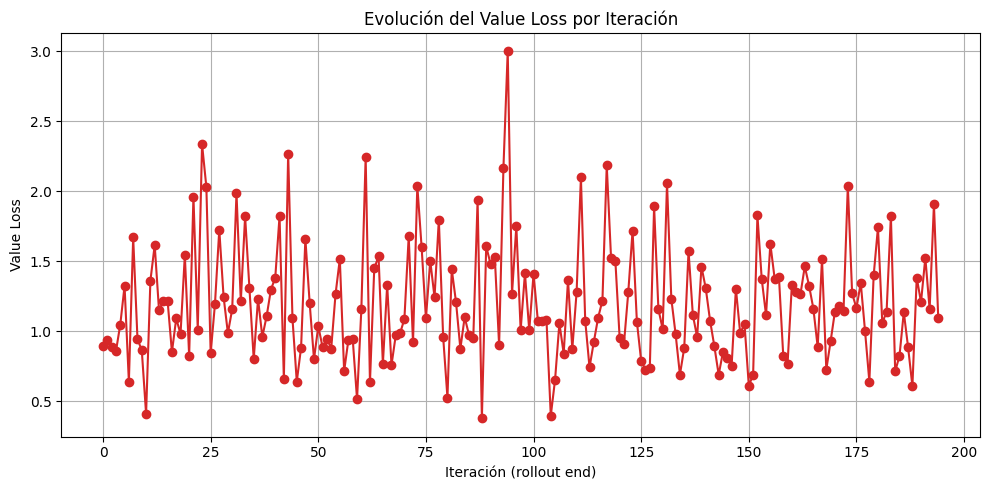


📊 RESULTADOS FINALES
       Precision@5  Recall@5  Avg Reward  Max Reward
Train       0.0221    0.0009      12.260        49.5
Valid       0.0200    0.0007      16.425        66.5
Test        0.0228    0.0007      16.780        63.5
🎯 Usuario ID: 188
🎬 Películas recomendadas (movieId): [62, 8972, 1103, 63181, 45028]
📽️ Títulos recomendados: ["Mr. Holland's Opus (1995)", 'National Treasure (2004)', 'Rebel Without a Cause (1955)', 'Tokyo Gore Police (Tôkyô zankoku keisatsu) (2008)', 'Prairie Home Companion, A (2006)']

🚀 Procesando combinación: 115000 películas y 10000 usuarios


<ipython-input-95-f5593b3db4d1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['movieId'] = filtered_df['movieId'].map(movie_mapping)
<ipython-input-95-f5593b3db4d1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['userId'] = filtered_df['userId'].map(user_mapping)
/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.06461167335510254 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


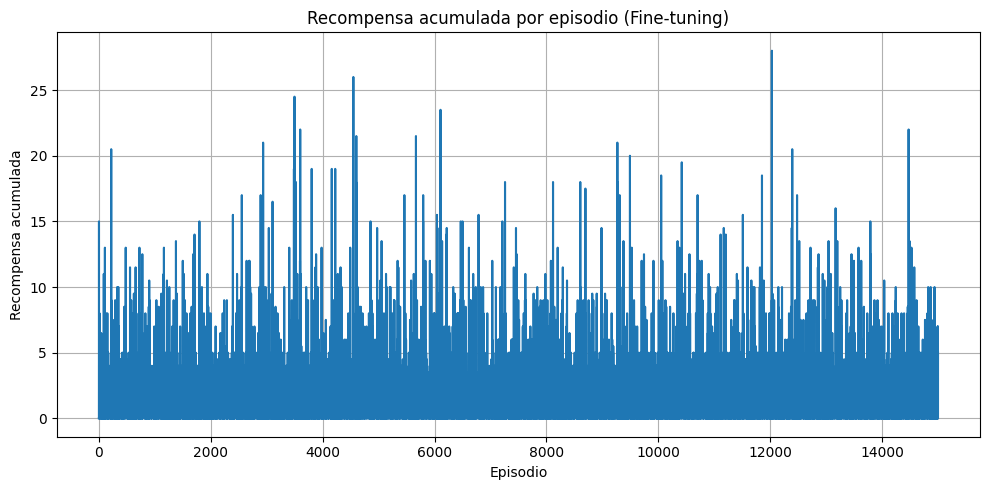

🔹 Recompensas iniciales: [0.0, 0.0, 15.0, 0.0, 0.0]
🔹 Máxima recompensa: 28.00
🔹 Promedio: 0.98
🔹 Promedio últimos 100 episodios: 1.07


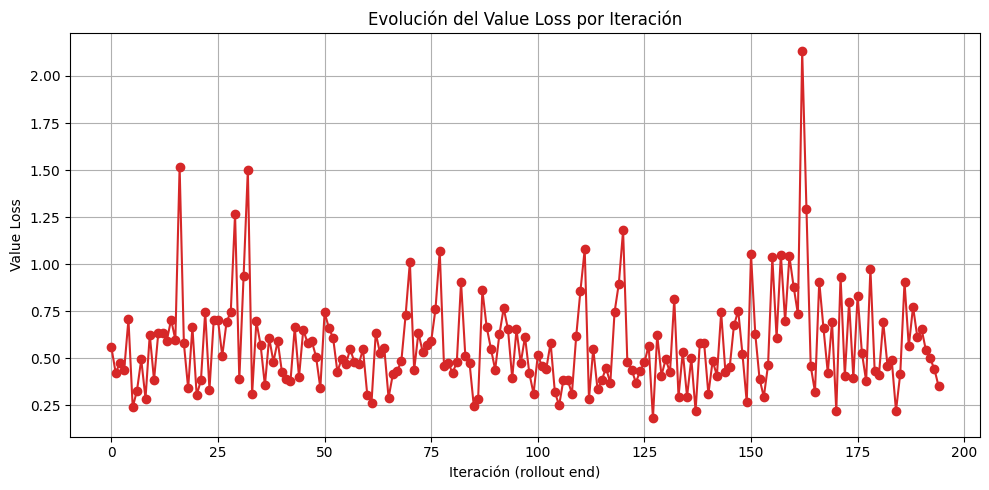


📊 RESULTADOS FINALES
       Precision@5  Recall@5  Avg Reward  Max Reward
Train       0.0122    0.0005      15.400        75.0
Valid       0.0116    0.0005      17.705        69.0
Test        0.0112    0.0005      16.300        75.0
🎯 Usuario ID: 1045
🎬 Películas recomendadas (movieId): [1461, 38046, 65259, 7586, 1209]
📽️ Títulos recomendados: ["Vegas Vacation (National Lampoon's Las Vegas Vacation) (1997)", 'Seven Swords (Chat gim) (2005)', 'Involuntary (De ofrivilliga) (2008)', 'Soldier of Orange (a.k.a. Survival Run) (Soldaat van Oranje) (1977)', "Once Upon a Time in the West (C'era una volta il West) (1968)"]

🚀 Procesando combinación: 16000 películas y 5000 usuarios


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.029297351837158203 seconds
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


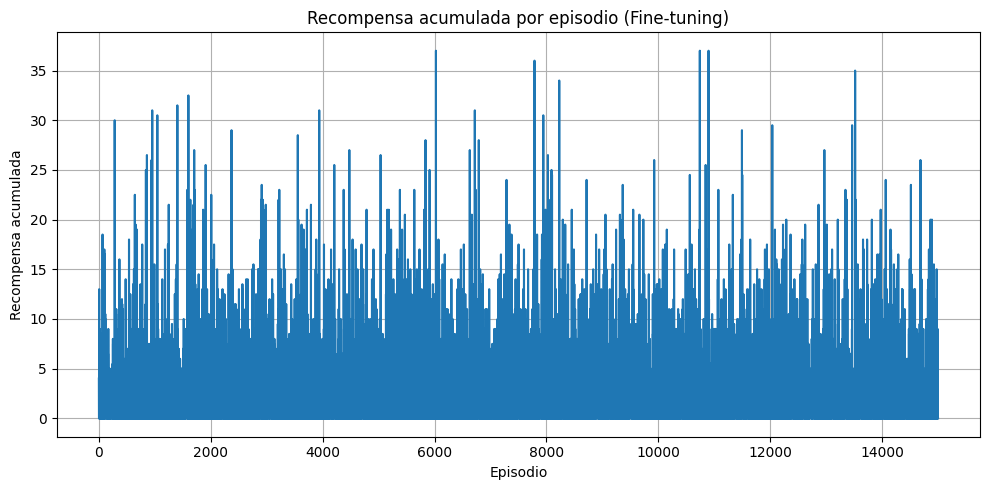

🔹 Recompensas iniciales: [4.0, 0.0, 0.0, 0.0, 0.0]
🔹 Máxima recompensa: 37.00
🔹 Promedio: 1.97
🔹 Promedio últimos 100 episodios: 2.17


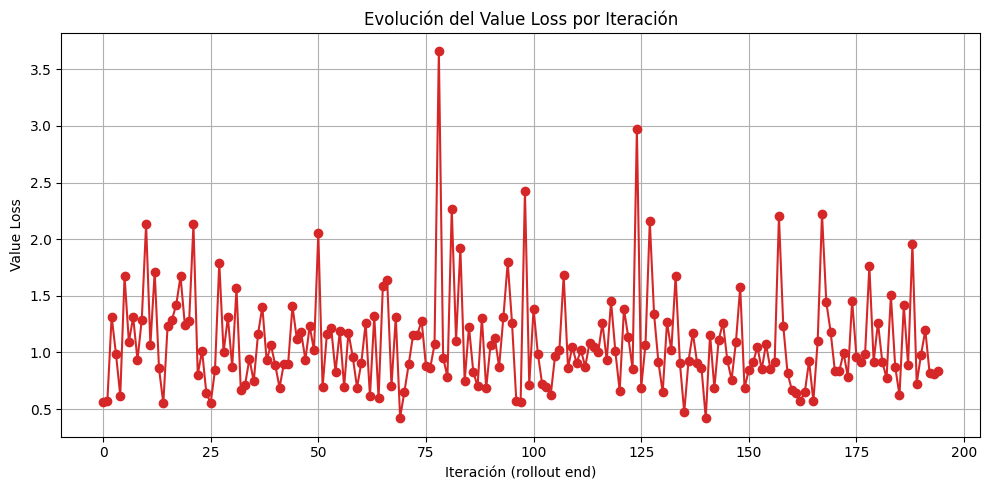


📊 RESULTADOS FINALES
       Precision@5  Recall@5  Avg Reward  Max Reward
Train       0.0220    0.0010       3.255        23.0
Valid       0.0208    0.0010       4.950        38.0
Test        0.0240    0.0009       4.230        30.0
🎯 Usuario ID: 3749
🎬 Películas recomendadas (movieId): [78088, 124, 94985, 27837, 858]
📽️ Títulos recomendados: ['Buried (2010)', "Star Maker, The (Uomo delle stelle, L') (1995)", 'Get the Gringo (2012)', 'Flight of the Phoenix (2004)', 'Godfather, The (1972)']


In [95]:
current_path = os.getcwd()
zip_path = os.path.join(current_path, "movielens.zip")
urlretrieve("http://files.grouplens.org/datasets/movielens/ml-20m.zip", zip_path)
ZipFile(zip_path, "r").extractall(current_path)

ratingDF = pd.read_csv(os.path.join(current_path, "ml-20m/ratings.csv"))
ratingDF['timestamp'] = ratingDF['timestamp'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
ratingDF['userId'] = ratingDF['userId'].astype(int)
ratingDF['movieId'] = ratingDF['movieId'].astype(int)
ratingDF['rating'] = ratingDF['rating'].astype(float)

combinations = [(1000, 1000), (50000, 5000), (115000, 10000), (16000, 5000)]

for num_movies, num_users in combinations:
    print(f"\n🚀 Procesando combinación: {num_movies} películas y {num_users} usuarios")

    df_movies = ratingDF.groupby("movieId").count().sort_values(by="rating", ascending=False).head(num_movies).index
    filtered_df = ratingDF[ratingDF.movieId.isin(df_movies)]

    df_users = filtered_df.groupby("userId").count().sort_values(by="rating", ascending=False).sample(n=num_users, random_state=42).index
    filtered_df = filtered_df[filtered_df.userId.isin(df_users)]

    movie_mapping = {movie: idx for idx, movie in enumerate(filtered_df.movieId.unique())}
    user_mapping = {user: idx for idx, user in enumerate(filtered_df.userId.unique())}
    filtered_df['movieId'] = filtered_df['movieId'].map(movie_mapping)
    filtered_df['userId'] = filtered_df['userId'].map(user_mapping)

    reverse_movie_mapping = {v: k for k, v in movie_mapping.items()}
    user_movie_ratings = filtered_df.groupby('userId').apply(lambda x: list(zip(x['movieId'], x['rating']))).to_dict()

    train_users, test_users = train_test_split(list(user_movie_ratings.keys()), test_size=0.2, random_state=2018)
    valid_users, test_users = train_test_split(test_users, test_size=0.5, random_state=2018)

    train_data = {u: user_movie_ratings[u] for u in train_users}
    valid_data = {u: user_movie_ratings[u] for u in valid_users}
    test_data = {u: user_movie_ratings[u] for u in test_users}

    train_rows = [(u, m, r) for u, movies in train_data.items() for m, r in movies]
    train_df = pd.DataFrame(train_rows, columns=['userId', 'movieId', 'rating'])

    row, col, data = train_df['userId'].values, train_df['movieId'].values, train_df['rating'].values
    ratings_matrix = coo_matrix((data, (row, col)))

    als_model = AlternatingLeastSquares(factors=400, regularization=0.1, iterations=100)
    als_model.fit(ratings_matrix.T)
    movie_embeddings = als_model.item_factors.to_numpy()

    train_env = MovieLensEmbeddingEnv(train_data, movie_embeddings)
    valid_env = MovieLensEmbeddingEnv(valid_data, movie_embeddings)
    test_env = MovieLensEmbeddingEnv(test_data, movie_embeddings)

    model = PPO("MlpPolicy", train_env, verbose=0, n_steps=1024, batch_size=64, n_epochs=20,
                learning_rate=1e-4, gamma=0.95, gae_lambda=0.92, clip_range=0.2, ent_coef=0.08)

    model.learn(total_timesteps=400_000)

    finetune_logger = RewardOnlyLogger()
    model.set_env(train_env)
    model.learn(total_timesteps=300_000, callback=finetune_logger)
    model.save(f"ppo_model_finetuned_{num_movies}x{num_users}")

    value_loss_logger = ValueLossLogger()
    model.learn(total_timesteps=200_000, callback=value_loss_logger)

    # === Gráficas y estadísticas ===
    plt.figure(figsize=(10, 5))
    plt.plot(finetune_logger.episode_rewards)
    plt.title("Recompensa acumulada por episodio (Fine-tuning)")
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa acumulada")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    rewards = finetune_logger.episode_rewards
    print("🔹 Recompensas iniciales:", rewards[:5])
    print(f"🔹 Máxima recompensa: {max(rewards):.2f}")
    print(f"🔹 Promedio: {sum(rewards)/len(rewards):.2f}")
    print(f"🔹 Promedio últimos 100 episodios: {sum(rewards[-100:])/min(len(rewards),100):.2f}")

    plt.figure(figsize=(10, 5))
    plt.plot(value_loss_logger.iterations, value_loss_logger.value_losses, color = 'tab:red', marker='o', linestyle='-')
    plt.title("Evolución del Value Loss por Iteración")
    plt.xlabel("Iteración (rollout end)")
    plt.ylabel("Value Loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    th.mean(th.tensor(value_loss_logger.value_losses))

    model = PPO.load(f"ppo_model_finetuned_{num_movies}x{num_users}")

    results = {}
    for name, env, data in [("Train", train_env, train_data),
                            ("Valid", valid_env, valid_data),
                            ("Test", test_env, test_data)]:

        p_at_k = precision_at_k(model, env, data, k=5)
        recall = recall_at_k(model, env, data, k=5)
        avg_reward, max_reward, _ = evaluate_reward(model, env)

        results[name] = {
            "Precision@5": round(p_at_k, 4),
            "Recall@5": round(recall, 4),
            "Avg Reward": round(avg_reward, 4),
            "Max Reward": round(max_reward, 4)
        }

    print("\n📊 RESULTADOS FINALES")
    print(pd.DataFrame(results).T)

    random_user = random.choice(list(test_data.keys()))
    recommended_ids = recomendar_peliculas_para_usuario(model, test_env, reverse_movie_mapping, user_id=random_user)
    print(f"🎯 Usuario ID: {random_user}")
    print("🎬 Películas recomendadas (movieId):", recommended_ids)

    movie_id_to_title = dict(zip(movies_df['movieId'], movies_df['title']))
    recommended_titles = [movie_id_to_title.get(mid, "⛔ No encontrado") for mid in recommended_ids]
    print("📽️ Títulos recomendados:", recommended_titles)

